In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

Load and process data, group by GraphSize and calculate means

In [2]:
df = pd.read_csv('analysis_results.csv')
# Group by GraphSize and calculate means for the summary metrics
df_summary = df.groupby('GraphSize').agg({
    'MeanTime': 'mean',
    'OptimalSize': 'mean',
    'MeanHeuristicSize': 'mean',
    'ApproximationRatio': 'mean',
    'OptimalMatchRate': 'mean'
}).reset_index()

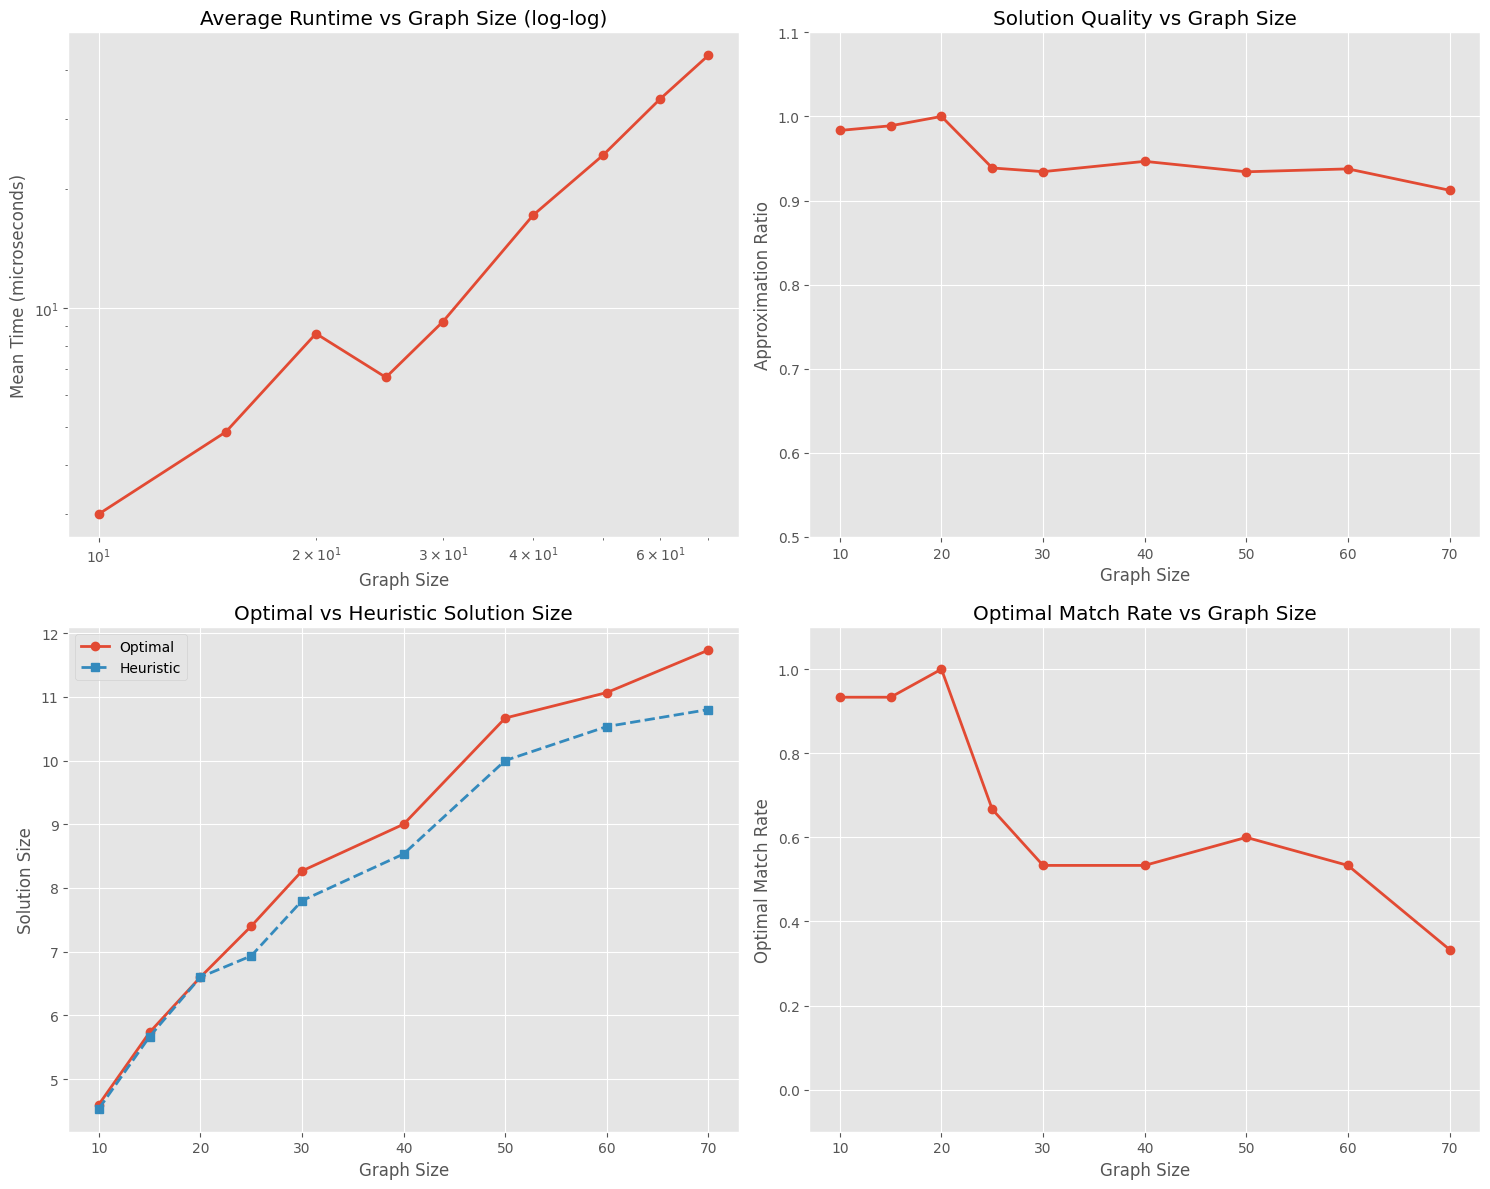

In [3]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 12))

# Plot 1: Runtime vs Graph Size (log-log)
plt.subplot(2, 2, 1)
plt.loglog(df_summary['GraphSize'], df_summary['MeanTime'], 'o-', linewidth=2)
# Remove confidence interval shading since we're using averaged data
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Mean Time (microseconds)')
plt.title('Average Runtime vs Graph Size (log-log)')

# Plot 2: Approximation Ratio vs Graph Size
plt.subplot(2, 2, 2)
plt.plot(df_summary['GraphSize'], df_summary['ApproximationRatio'], 'o-', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Approximation Ratio')
plt.title('Solution Quality vs Graph Size')
plt.ylim(0.5, 1.1)  # Ratio should be between 0 and 1

# Plot 3: Optimal vs Heuristic Solution Size
plt.subplot(2, 2, 3)
plt.plot(df_summary['GraphSize'], df_summary['OptimalSize'], 'o-', label='Optimal', linewidth=2)
plt.plot(df_summary['GraphSize'], df_summary['MeanHeuristicSize'], 's--', label='Heuristic', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Solution Size')
plt.title('Optimal vs Heuristic Solution Size')
plt.legend()

# Plot 4: Optimal Match Rate vs Graph Size
plt.subplot(2, 2, 4)
plt.plot(df_summary['GraphSize'], df_summary['OptimalMatchRate'], 'o-', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Optimal Match Rate')
plt.title('Optimal Match Rate vs Graph Size')
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [4]:
# Cell 4: Print summary statistics
print("Summary Statistics:")
print(f"Average Approximation Ratio: {df_summary['ApproximationRatio'].mean():.3f}")
print(f"Average Optimal Match Rate: {df_summary['OptimalMatchRate'].mean():.3f}")
print(f"Maximum Runtime: {df_summary['MeanTime'].max():.2f} microseconds")

Summary Statistics:
Average Approximation Ratio: 0.953
Average Optimal Match Rate: 0.674
Maximum Runtime: 43.62 microseconds
